# Выявление сердечно-сосудистых заболеваний
## Источник: https://mlbootcamp.ru/round/12/sandbox/
## Информация о датасете

В рамках датасета вам нужно предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован из 100.000 реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст
 - Рост
 - Вес
 - Пол
 
Результаты измерения:

 - Артериальное давление верхнее и нижнее
 - Холестерин
 - Глюкоза
 
Субъективные признаки:

 - Курение
 - Употребление Алкоголя
 - Физическая активность

Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
data = pd.read_csv('heart_diseases/train.csv', sep = ';', engine = 'python')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
data[['age', 'weight','cholesterol','cardio']]

,age,weight,cholesterol,cardio
0,18393,62.0,1,0
1,20228,85.0,3,1
2,18857,64.0,3,1
3,17623,82.0,1,1
4,17474,56.0,1,0
5,21914,67.0,2,0
6,22113,93.0,3,0
7,22584,95.0,3,1
8,17668,71.0,1,0
9,19834,68.0,1,0


In [7]:
data['age'] = data['age'].apply(lambda x: x/365)

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


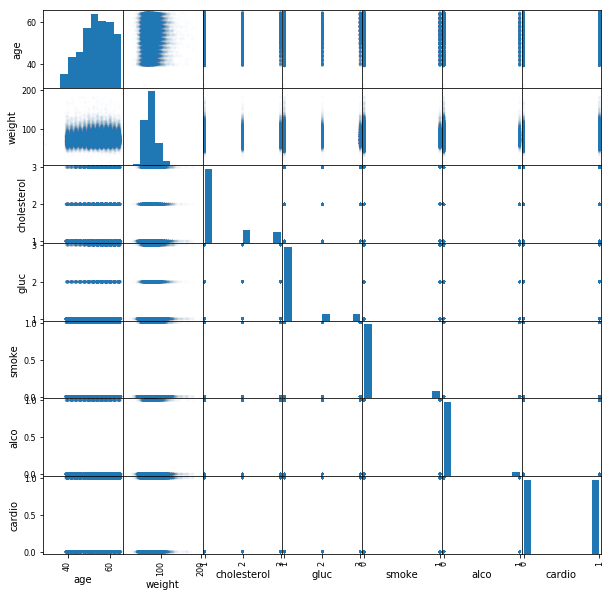

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['age','weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'cardio']], alpha = .01, figsize = (10, 10))
pass

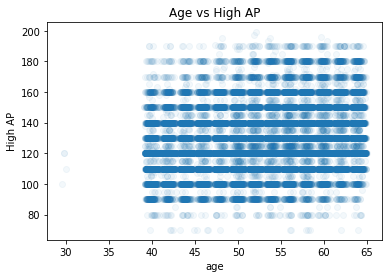

In [11]:
flt_data =data[(60 < data['ap_hi']) & (data['ap_hi'] < 200)]
plt.plot(flt_data['age'], flt_data['ap_hi'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('High AP')
plt.title('Age vs High AP')
pass

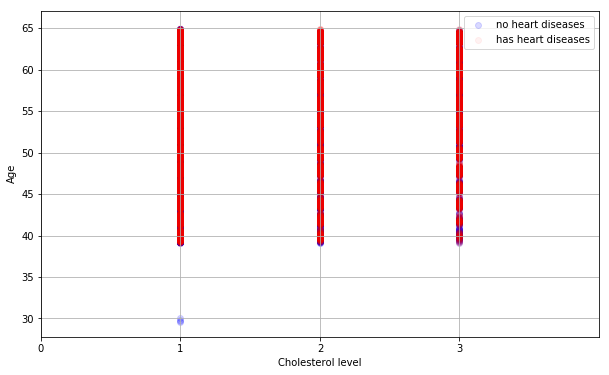

In [12]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['cardio'] == 0]['cholesterol'],
            data[data['cardio'] == 0]['age'],
            alpha = 0.15,
            label = 'no heart diseases',
            color = 'b')

plt.scatter(data[data['cardio'] == 1]['cholesterol'],
            data[data['cardio'] == 1]['age'],
            alpha = 0.05,
            label = 'has heart diseases',
            color = 'r')

plt.xlabel('Cholesterol level')
plt.xticks(range(4))
plt.xlim(0,4)
plt.ylabel('Age')
plt.legend()
plt.grid()

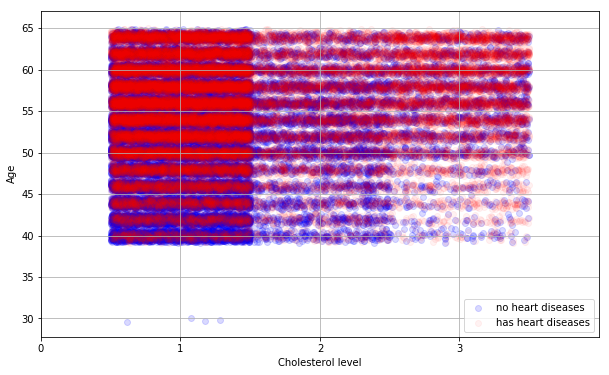

In [13]:
np.random.seed(0)
cholesterol_rnd = data['cholesterol'] + np.random.rand(data.shape[0]) - .5
plt.figure(figsize = (10, 6))

plt.scatter(cholesterol_rnd[data['cardio'] == 0],
            data[data['cardio'] == 0]['age'],
            alpha = 0.15,
            label = 'no heart diseases',
            color = 'b')

plt.scatter(cholesterol_rnd[data['cardio'] == 1],
            data[data['cardio'] == 1]['age'],
            alpha = 0.05,
            label = 'has heart diseases',
            color = 'r')

plt.xlabel('Cholesterol level')
plt.xticks(range(4))
plt.xlim(0,4)
plt.ylabel('Age')
plt.legend()
plt.grid()

Оценим ошибку байесовского классификатора, решив задачу методом ближайшего соседа.
Тогда оценка будет в ~2 меньше ошибки на указанном методе.

In [16]:
X = data.drop('cardio', axis=1)
y = data['cardio']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

49000 21000


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.3956190476190476
